In [33]:
import torchvision.transforms as transforms
import cv2
import numpy as np
import torchvision
import torch
from PIL import Image

In [34]:
coco_names = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', #'watermelon', 'tree'
]

In [35]:
COLORS = np.random.uniform(0, 255, size=(len(coco_names), 3))

In [36]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [37]:
def predict(image, model, device, detection_threshold):
    
    image = transform(image).to(device)
    image = image.unsqueeze(0) 
    outputs = model(image) 
    
    pred_classes = [coco_names[i] for i in outputs[0]['labels'].cpu().numpy()]
    
    pred_scores = outputs[0]['scores'].detach().cpu().numpy()
   
    pred_bboxes = outputs[0]['boxes'].detach().cpu().numpy()
    
    boxes = pred_bboxes[pred_scores >= detection_threshold].astype(np.int32)
    
    return boxes, pred_classes, outputs[0]['labels']

In [38]:
def draw_boxes(boxes, classes, labels, image):
    
    image = cv2.cvtColor(np.asarray(image), cv2.COLOR_BGR2RGB)
    for i, box in enumerate(boxes):
        color = COLORS[labels[i]]
        cv2.rectangle(
            image,
            (int(box[0]), int(box[1])),
            (int(box[2]), int(box[3])),
            color, 2
        )
        cv2.putText(image, classes[i], (int(box[0]), int(box[1]-5)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2, 
                    lineType=cv2.LINE_AA)
    return image

In [39]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True, 
                                                    min_size=1024)

In [40]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

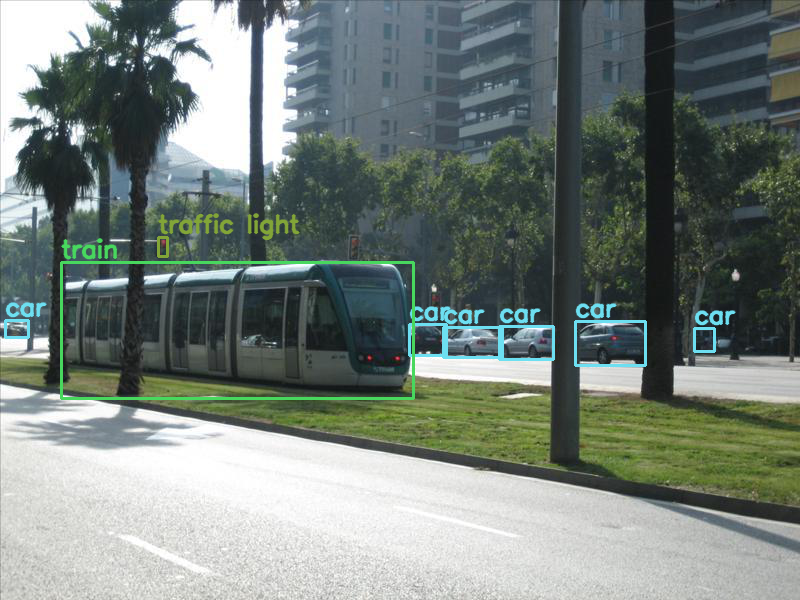

In [43]:
from google.colab.patches import cv2_imshow

#Run inference
image = Image.open("/content/v7w_22.jpg")
model.eval().to(device)
boxes, classes, labels = predict(image, model, device, 0.8)
image = draw_boxes(boxes, classes, labels, image)
cv2_imshow(image)